In [28]:
#IMPORTING REQUIRED LIBRARIES
from sklearn.model_selection  import train_test_split
from sklearn.neighbors        import KNeighborsClassifier
from sklearn.preprocessing    import MinMaxScaler, LabelEncoder, OneHotEncoder 
from sklearn.model_selection  import KFold
from sklearn.model_selection  import cross_val_score
from sklearn.model_selection  import cross_val_predict
from sklearn                  import metrics
from sklearn.metrics          import precision_score ,confusion_matrix, recall_score ,precision_recall_curve,PrecisionRecallDisplay,f1_score
from sklearn.metrics          import roc_curve , RocCurveDisplay , roc_auc_score
from sklearn.model_selection  import GridSearchCV
#import seaborn as sns
import math
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
%matplotlib inline


In [29]:
#IMPORTING DATA
df = pd.read_csv("data.csv" , index_col = 0)
df.head()


,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


In [30]:
#columns such as location and country should be categorized in values ranged from 0 to 8 
#while age to be categorized from 0 to 2 which will help us in the next step
#which is: onehot encoding
newLocation = pd.cut(df.location, bins=8 , labels=np.arange(8), right=False)
df['location'] = newLocation

newCountry = pd.cut(df.country, bins=8 , labels=np.arange(8), right=False)
df['country'] = newCountry

newAge = pd.cut(df.age, bins=3, labels=np.arange(3), right=False)
df['age'] = newAge

df.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,6,1,1,2,1,0,14,31,19,12,3,1,8,1
1,5,1,0,1,0,1,14,31,19,12,3,1,0,0
2,7,1,1,1,0,1,14,31,19,12,3,1,13,0
3,6,1,0,1,1,0,14,31,19,12,3,1,0,0
4,6,1,1,1,0,0,14,31,19,12,3,1,0,0


In [31]:
#One-Hot_encoding implementation by converting the data first to label encoding 
#and then transform it to be one hot encoded

#Location encoding
label_encoder = LabelEncoder()
df['location'] = label_encoder.fit_transform(df['location'])
ohe1 = OneHotEncoder(sparse=False)
df[['L0','L1', 'L2' , 'L3' , 'L4' , 'L5' , 'L6' , 'L7'  ]] = ohe1.fit_transform(df['location'].values.reshape(-1,1))

#Country encoding
label_encoderC = LabelEncoder()
df['country'] = label_encoderC.fit_transform(df['country'])
ohe2 = OneHotEncoder(sparse=False)
df[['C0','C1', 'C2' , 'C3' , 'C4' , 'C5' , 'C6' , 'C7' ]] = ohe2.fit_transform(df['country'].values.reshape(-1,1))

#gender encoding
label_encoderG = LabelEncoder()
df['gender'] = label_encoderG.fit_transform(df['gender'])
ohe3 = OneHotEncoder(sparse=False)
df[['Male','Female', 'Undefined']] = ohe3.fit_transform(df['gender'].values.reshape(-1,1))

df = df.drop("location", axis=1)
df = df.drop("country", axis=1)
df = df.drop("gender", axis=1)

df.head()

,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,...,C1,C2,C3,C4,C5,C6,C7,Male,Female,Undefined
0,2,1,0,14,31,19,12,3,1,8,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,1,14,31,19,12,3,1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,0,1,14,31,19,12,3,1,13,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,1,0,14,31,19,12,3,1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,0,0,14,31,19,12,3,1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [32]:
#Reordering the columns
df = df[['age', 'vis_wuhan', 'from_wuhan' , 'symptom1' , 'symptom2' , 'symptom3' , 'symptom4' , 'symptom5' , 'symptom6' , 'diff_sym_hos' ,'L0','L1', 'L2' , 'L3' , 'L4' , 'L5' , 'L6' , 'L7'  , 'C0','C1', 'C2' , 'C3' , 'C4' , 'C5' , 'C6' , 'C7'  ,'Male','Female' ,'Undefined' , 'result']]
X = df.iloc[:,0:29].values
Y = df.iloc[:,29:30].values
df.head()


,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,...,C2,C3,C4,C5,C6,C7,Male,Female,Undefined,result
0,2,1,0,14,31,19,12,3,1,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1,1,0,1,14,31,19,12,3,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,1,0,1,14,31,19,12,3,1,13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,1,1,0,14,31,19,12,3,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,1,0,0,14,31,19,12,3,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [33]:
# Nomralization of data which is a way to improve the accuracy of the models
scaler = MinMaxScaler()
nX = scaler.fit_transform(X)
nY = scaler.fit_transform(Y)


df.head()

,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,...,C2,C3,C4,C5,C6,C7,Male,Female,Undefined,result
0,2,1,0,14,31,19,12,3,1,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1,1,0,1,14,31,19,12,3,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,1,0,1,14,31,19,12,3,1,13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,1,1,0,14,31,19,12,3,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,1,0,0,14,31,19,12,3,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [34]:
## Calculating Correlation can increase accuracy of the model when dropping the correlated features,
## we haven't used this method in order to keep the given (collected) data unchanged. 

In [35]:
##IMPLEMENTATION OF CORRELATION##

#correlations = df.corr()

# plot the heatmap 
#sns.heatmap(correlations, xticklabels=correlations.columns, yticklabels=correlations.columns, annot=True)

# plot the clustermap 
#sns.clustermap(correlations, xticklabels=correlations.columns, yticklabels=correlations.columns, annot=True)

In [36]:
#First step of cross-validation: splitting the data into folds, number of folds is recommended to be 10
fold = KFold(n_splits=10, shuffle=False)
print(fold)

KFold(n_splits=10, random_state=None, shuffle=False)


In [37]:
gnb = GaussianNB(priors = None)

#Hypter parameter tuning
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=gnb, 
                 param_grid=params_NB, 
                 cv=fold.n_splits,   
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(nX, nY.ravel())



Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [38]:
gs_NB.best_params_

{'var_smoothing': 1.0}

In [39]:
#accuracy calculation for each Fold
scores=cross_val_score(gs_NB.best_estimator_,nX,nY.ravel(),cv=fold.n_splits,scoring='accuracy')
for i in range(10):
    print(scores[i] , "\n")


0.8735632183908046 

0.8735632183908046 

0.8620689655172413 

0.9186046511627907 

0.872093023255814 

0.872093023255814 

0.8837209302325582 

0.8837209302325582 

0.8837209302325582 

0.8953488372093024 



In [40]:
scores.mean()

0.8818497727880246

In [41]:
gnb.fit(nX,nY.ravel())

GaussianNB()

In [42]:
y_pred=cross_val_predict(gs_NB.best_estimator_,nX,nY.ravel(),cv=10)

In [43]:
cm = confusion_matrix(nY, y_pred) #diagonal represent the TRUE prediction, while OFF diagonal represent FALSE prediction

In [44]:
print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[738  17]
 [ 85  23]]

True Positives(TP) =  738

True Negatives(TN) =  23

False Positives(FP) =  17

False Negatives(FN) =  85


# Precision, Recall and AUC calculation/plot 

In [45]:
precisions, recalls, thresholds = precision_recall_curve(nY, y_pred)

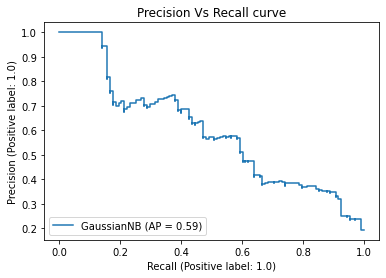

In [46]:
display = PrecisionRecallDisplay.from_estimator(gs_NB.best_estimator_,nX,nY.ravel())
_ = display.ax_.set_title("Precision Vs Recall curve")

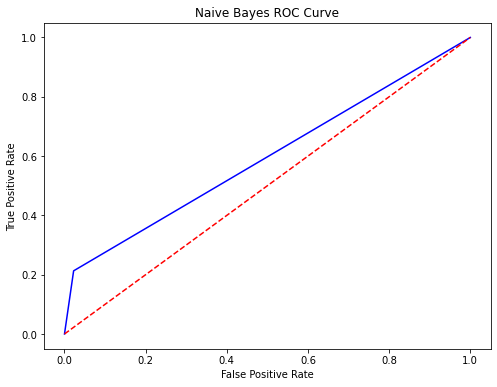

In [47]:
fpr_nb, tpr_nb, threshold_nb = roc_curve(nY, y_pred)
plt.figure(figsize = (8,6))
plt.plot(fpr_nb, tpr_nb, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.title("Naive Bayes ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [48]:
#Area under curve 
#where the larger the AUC, The better performance of the model
AUC = roc_auc_score(nY, y_pred)
AUC

0.5952232033357862

In [49]:
print(precisions)
print(recalls)
print(thresholds)

[0.12514484 0.575      1.        ]
[1.         0.21296296 0.        ]
[0. 1.]
